# Weather Data Analysis

## Analysis

- **The closer you are to the Equator the warmer the weather:** As we can see in the ScatterPlot "City Latitude vs Temperature", the closer you are to the equator the warmer the weather is. Also because we are on January, it is winter season (at least in the north part of the planet) the weather is significanlty colder.. having cities below -40 C.
- **No obvious relationship between Latitude vs Humidity or Latitude vs Cloudiness** It seems that there is no relationship between Latitude vs Humidity or Latitude vs Cloudiness. Humidity and Cloudiness can be affected by many variables like whether the city is close to the sea, if there is some meteorological event close to a city, or even some random weather conditions going on. 
- **Windy places seem to be in the North** There is no obvious relationship between Wind Speed and Latitude, however it seems that there are some cities in the North that have high wind speeds. This might or might not be related to the weather. It can also be related to special conditions on those places.

---

### Import Dependencies

In [3]:
#import dependencies

import random
import requests
import pandas as pd
import csv
import matplotlib.pyplot as plt
import matplotlib as mpl

from citipy import citipy
from config import api_key

import numpy as np

### Import of Country catalog 

ISO 3166 Countries with Regional Codes (https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes)

In [22]:

countries_catalog = pd.read_csv("Resources/ISO-3166-Countries-with-Regional-Codes.csv",encoding='utf-8', keep_default_na=False)
## added keep_default_na=False  because 'NA' country code was interpreted as NaN value instead of Namibia 

countries_catalog = countries_catalog[['name','alpha-2']]

countries_catalog.columns = ['country_name', 'country_code']

countries_catalog.head()

,country_name,country_code
0,Afghanistan,AF
1,Åland Islands,AX
2,Albania,AL
3,Algeria,DZ
4,American Samoa,AS


In [23]:
countries_catalog.count()

country_name    249
country_code    249
dtype: int64

In [24]:
#name = countries_catalog[(countries_catalog.country_code == 'AX')]['country_name']

name = countries_catalog[ countries_catalog["country_code"] == "NA" ].values.tolist()[0][0]

print(name)

Namibia


### Random latitudes

- Range Latitudes: -90 to +90
- Range Longitudes: -180 to +180

In [25]:
coord_list = []

#Generate 600 random lats and lons

ix = 0
jx = 100
#jx = 2

while(ix<36):
    
    range1 = -90 + (ix*5)
    range2 = range1 + 5 
    
    range3 = -180
    range4 = 180
    
    print(f'#### {ix}) Get {jx} random Lats from {range1}, {range2} and random Long from {range3}, {range4}')
    
    for i in range(jx):
        
        rand_lat = round( random.uniform(range1, range2) , 5) 
        rand_lon = round( random.uniform(range3, range4) , 5) 

        tmp = (rand_lat,rand_lon)
        coord_list.append(tmp)
    
    ix += 1

print(f'Coords: {len(coord_list)}')
## I had issues finding UNIQUE cities because the rando was too wide.. 
## so to solve this I started getting data from ranges from 10 to 10.. this is getting random numbers 
# from -90 to -80, then from -80 to -70

#### 0) Get 100 random Lats from -90, -85 and random Long from -180, 180
#### 1) Get 100 random Lats from -85, -80 and random Long from -180, 180
#### 2) Get 100 random Lats from -80, -75 and random Long from -180, 180
#### 3) Get 100 random Lats from -75, -70 and random Long from -180, 180
#### 4) Get 100 random Lats from -70, -65 and random Long from -180, 180
#### 5) Get 100 random Lats from -65, -60 and random Long from -180, 180
#### 6) Get 100 random Lats from -60, -55 and random Long from -180, 180
#### 7) Get 100 random Lats from -55, -50 and random Long from -180, 180
#### 8) Get 100 random Lats from -50, -45 and random Long from -180, 180
#### 9) Get 100 random Lats from -45, -40 and random Long from -180, 180
#### 10) Get 100 random Lats from -40, -35 and random Long from -180, 180
#### 11) Get 100 random Lats from -35, -30 and random Long from -180, 180
#### 12) Get 100 random Lats from -30, -25 and random Long from -180, 180
#### 13) Get 100 random Lats from -25, -20 and r

### Get the cities

These have to be at least 500 unique cities

In [28]:
cities = []

for coord in coord_list:
    
    city = citipy.nearest_city(coord[0],coord[1])
    city_name = city.city_name
    country_code = city.country_code

    if (country_code.upper() == 'AN'):
        country_code = 'BQ'
        print('Changed AN for BQ (AN was deleted from the ISO in 2010)')

    try:
        country_name = countries_catalog[ countries_catalog["country_code"] == country_code.upper() ].values.tolist()[0][0]
    except:
        print(f'Not found in catalog {country_code.upper()}')
        country_name = ''
    
    #print(f'processing #  City Name: {city_name} - Country Code: {country_code}')
    
    tmp = (city_name, country_code, country_name)
    cities.append(tmp)

Changed AN for BQ (AN was deleted from the ISO in 2010)
Changed AN for BQ (AN was deleted from the ISO in 2010)


In [29]:
len(cities)

3600

In [30]:
unique_cities = list(set(cities))

In [31]:
len(unique_cities)

1162

### Data Retrival

OpenWeatherMap - Weather API

In [32]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url_tmp = f'{url}appid={api_key}&units={units}&'


In [33]:
#coord_list = [(lat,lon)]
city_name_list = []
country_code_lsit = []
country_name_list = []

lon_api_list = []
lat_api_list = []
temp_list = []
humidity_list = []
wind_list = []
clouds = []
country_api = []
city_id_api = []
city_api = []

i = 0
# Loop through the list of cities and perform a request for data on each
for cities in unique_cities:
    
    i += 1
    print(f'[#######] {i}: Place: {cities[0].capitalize()}, {cities[2].capitalize()}')
    
    query_url = query_url_tmp + f'q={cities[0]},{cities[1]}'
    
    #print(query_url) #do not print when pushing to github
    try:
        response = requests.get(query_url).json()
        response['sys']['country']
    except:
        print(f'[#######] PLACE NOT FOUND: {cities[0].capitalize()}, {cities[2].capitalize()}')
        continue
    
    city_name_list.append(cities[0].capitalize())
    country_code_lsit.append(cities[1].upper())
    country_name_list.append(cities[2].capitalize())
    
    lon_api_list.append(response['coord']['lon'])
    lat_api_list.append(response['coord']['lat'])
    temp_list.append(response['main']['temp'])
    humidity_list.append(response['main']['humidity'])
    wind_list.append(response['wind']['speed'])
    clouds.append(response['clouds']['all'])
    country_api.append(response['sys']['country'])
    city_id_api.append(response['id'])
    city_api.append(response['name'])
    
    #print(response)



[#######] 1: Place: Yerky, Ukraine
[#######] 2: Place: Caconda, Angola
[#######] 3: Place: Nguiu, Australia
[#######] PLACE NOT FOUND: Nguiu, Australia
[#######] 4: Place: Diamantino, Brazil
[#######] 5: Place: Huarmey, Peru
[#######] 6: Place: Abha, Saudi arabia
[#######] 7: Place: Hinton, Canada
[#######] 8: Place: Ribeira brava, Cabo verde
[#######] PLACE NOT FOUND: Ribeira brava, Cabo verde
[#######] 9: Place: Pevek, Russian federation
[#######] 10: Place: Hirara, Japan
[#######] 11: Place: Puerto berrio, Colombia
[#######] 12: Place: Jamestown, Saint helena, ascension and tristan da cunha
[#######] 13: Place: Aviles, Spain
[#######] 14: Place: Constitucion, Chile
[#######] 15: Place: Hidalgotitlan, Mexico
[#######] 16: Place: Klaksvik, Faroe islands
[#######] 17: Place: Gumushane, Turkey
[#######] PLACE NOT FOUND: Gumushane, Turkey
[#######] 18: Place: Nome, United states of america
[#######] 19: Place: Baculin, Philippines
[#######] 20: Place: Tommot, Russian federation
[#######]

[#######] PLACE NOT FOUND: Olafsvik, Iceland
[#######] 166: Place: Istanbul, Turkey
[#######] 167: Place: Barrow, United states of america
[#######] 168: Place: Puerto leguizamo, Colombia
[#######] 169: Place: French harbor, Honduras
[#######] 170: Place: Tiznit, Morocco
[#######] 171: Place: Cangzhou, China
[#######] 172: Place: Diego de almagro, Chile
[#######] 173: Place: Pedasi, Panama
[#######] 174: Place: Khandyga, Russian federation
[#######] 175: Place: Mantua, Cuba
[#######] 176: Place: Coquimbo, Chile
[#######] 177: Place: Mahadday weyne, Somalia
[#######] PLACE NOT FOUND: Mahadday weyne, Somalia
[#######] 178: Place: Klyuchi, Russian federation
[#######] 179: Place: Avera, French polynesia
[#######] PLACE NOT FOUND: Avera, French polynesia
[#######] 180: Place: Mazagao, Brazil
[#######] 181: Place: Marawi, Sudan
[#######] 182: Place: Teya, Russian federation
[#######] 183: Place: Quang ngai, Viet nam
[#######] 184: Place: Hilo, United states of america
[#######] 185: Place: 

[#######] 325: Place: Benghazi, Libya
[#######] 326: Place: Ozinki, Russian federation
[#######] 327: Place: Kavali, India
[#######] 328: Place: Zhigansk, Russian federation
[#######] 329: Place: Auki, Solomon islands
[#######] 330: Place: Bennettsville, United states of america
[#######] 331: Place: Acara, Brazil
[#######] PLACE NOT FOUND: Acara, Brazil
[#######] 332: Place: Ciumani, Romania
[#######] 333: Place: Sao filipe, Cabo verde
[#######] 334: Place: Katsuura, Japan
[#######] 335: Place: Luancheng, China
[#######] 336: Place: Prince rupert, Canada
[#######] 337: Place: Kulhudhuffushi, Maldives
[#######] 338: Place: Pervomayskoye, Ukraine
[#######] PLACE NOT FOUND: Pervomayskoye, Ukraine
[#######] 339: Place: Puerto varas, Chile
[#######] 340: Place: Nichinan, Japan
[#######] 341: Place: Hobart, Australia
[#######] 342: Place: Balikpapan, Indonesia
[#######] 343: Place: Chumikan, Russian federation
[#######] 344: Place: Bilma, Niger
[#######] 345: Place: Longido, Tanzania, unite

[#######] 489: Place: Doembang nangbuat, Thailand
[#######] 490: Place: Todos santos, Mexico
[#######] 491: Place: Iracoubo, French guiana
[#######] 492: Place: Iuna, Brazil
[#######] 493: Place: Wadi musa, Jordan
[#######] 494: Place: Leo, Burkina faso
[#######] 495: Place: Yar-sale, Russian federation
[#######] 496: Place: Ilulissat, Greenland
[#######] 497: Place: Saint-philippe, Réunion
[#######] 498: Place: Zhezkazgan, Kazakhstan
[#######] 499: Place: Bongandanga, Congo (democratic republic of the)
[#######] 500: Place: Zaragoza, Mexico
[#######] 501: Place: Kaitangata, New zealand
[#######] 502: Place: Oda, Japan
[#######] 503: Place: Ranfurly, New zealand
[#######] 504: Place: Leningradskiy, Russian federation
[#######] 505: Place: Shimoda, Japan
[#######] 506: Place: Seoul, Korea (republic of)
[#######] 507: Place: Port augusta, Australia
[#######] 508: Place: Praya, Indonesia
[#######] 509: Place: Mayor pablo lagerenza, Paraguay
[#######] 510: Place: Namibe, Angola
[#######] 5

[#######] PLACE NOT FOUND: Naftah, Tunisia
[#######] 657: Place: Bentiu, Sudan
[#######] PLACE NOT FOUND: Bentiu, Sudan
[#######] 658: Place: Yaan, China
[#######] PLACE NOT FOUND: Yaan, China
[#######] 659: Place: Wawa, Canada
[#######] 660: Place: Haapsalu, Estonia
[#######] 661: Place: Matameye, Niger
[#######] PLACE NOT FOUND: Matameye, Niger
[#######] 662: Place: Kuusamo, Finland
[#######] 663: Place: Yellowknife, Canada
[#######] 664: Place: Bethel, United states of america
[#######] 665: Place: College, United states of america
[#######] 666: Place: Vlagtwedde, Netherlands
[#######] 667: Place: San-pedro, Côte d'ivoire
[#######] 668: Place: Kita, Mali
[#######] 669: Place: Mokhsogollokh, Russian federation
[#######] 670: Place: Kavaratti, India
[#######] 671: Place: Bereza, Russian federation
[#######] PLACE NOT FOUND: Bereza, Russian federation
[#######] 672: Place: Esperance, Australia
[#######] 673: Place: Russkaya polyana, Russian federation
[#######] 674: Place: Umm lajj, S

[#######] 819: Place: Hegang, China
[#######] 820: Place: Malakal, Sudan
[#######] PLACE NOT FOUND: Malakal, Sudan
[#######] 821: Place: Salalah, Oman
[#######] 822: Place: Verkh-usugli, Russian federation
[#######] 823: Place: Westerland, Germany
[#######] 824: Place: Barabinsk, Russian federation
[#######] 825: Place: Verkhnevilyuysk, Russian federation
[#######] 826: Place: San jeronimo, Mexico
[#######] 827: Place: Marcona, Peru
[#######] PLACE NOT FOUND: Marcona, Peru
[#######] 828: Place: Oum hadjer, Chad
[#######] 829: Place: Dingle, Ireland
[#######] 830: Place: Paamiut, Greenland
[#######] 831: Place: Irara, Brazil
[#######] 832: Place: Beinamar, Chad
[#######] 833: Place: Salvador, Brazil
[#######] 834: Place: Rio branco, Brazil
[#######] 835: Place: Severomuysk, Russian federation
[#######] 836: Place: Alizai, Pakistan
[#######] 837: Place: Busselton, Australia
[#######] 838: Place: Nanortalik, Greenland
[#######] 839: Place: Imbituba, Brazil
[#######] 840: Place: Vila velha

[#######] 990: Place: Veraval, India
[#######] 991: Place: Nador, Morocco
[#######] 992: Place: Krasnyy yar, Russian federation
[#######] 993: Place: Tianpeng, China
[#######] 994: Place: Petatlan, Mexico
[#######] 995: Place: Toliary, Madagascar
[#######] PLACE NOT FOUND: Toliary, Madagascar
[#######] 996: Place: Georgetown, Saint helena, ascension and tristan da cunha
[#######] 997: Place: Rorvik, Norway
[#######] 998: Place: Banff, Canada
[#######] 999: Place: Sao sebastiao, Brazil
[#######] 1000: Place: Severnyy, Russian federation
[#######] PLACE NOT FOUND: Severnyy, Russian federation
[#######] 1001: Place: Asau, Tuvalu
[#######] PLACE NOT FOUND: Asau, Tuvalu
[#######] 1002: Place: Milkovo, Russian federation
[#######] PLACE NOT FOUND: Milkovo, Russian federation
[#######] 1003: Place: Ahmadpur sial, Pakistan
[#######] 1004: Place: Zaltan, Libya
[#######] 1005: Place: Mariental, Namibia
[#######] 1006: Place: Lorengau, Papua new guinea
[#######] 1007: Place: Chambas, Cuba
[######

[#######] 1144: Place: Adilabad, India
[#######] 1145: Place: Malanje, Angola
[#######] 1146: Place: Galiwinku, Australia
[#######] PLACE NOT FOUND: Galiwinku, Australia
[#######] 1147: Place: Remedios, Cuba
[#######] 1148: Place: Williston, United states of america
[#######] 1149: Place: Pryshyb, Ukraine
[#######] 1150: Place: Namatanai, Papua new guinea
[#######] 1151: Place: Crato, Brazil
[#######] 1152: Place: Cherkasskoye, Russian federation
[#######] 1153: Place: Peniche, Portugal
[#######] 1154: Place: Waverly, United states of america
[#######] 1155: Place: Haibowan, China
[#######] PLACE NOT FOUND: Haibowan, China
[#######] 1156: Place: Rockhampton, Australia
[#######] 1157: Place: Eyemouth, United kingdom of great britain and northern ireland
[#######] 1158: Place: Cape town, South africa
[#######] 1159: Place: Lazarev, Russian federation
[#######] 1160: Place: Meadow lake, Canada
[#######] 1161: Place: Tual, Indonesia
[#######] 1162: Place: Ambilobe, Madagascar


In [34]:
# Cities found on the WeatherAPI

len(city_api)

1024

### Pandas Dataframe creation

In [35]:
weather_data = pd.DataFrame(
                {'City_citipy': city_name_list,
                'Country_code_citipy': country_code_lsit,
                 'Country_Name_ISO': country_name_list,
                'City_ID': city_id_api,
                'City': city_api,
                'Country': country_api,
                'Longitude': lon_api_list,
                'Latitude': lat_api_list,
                'Temperature': temp_list,
                'Humidity': humidity_list,
                'Wind': wind_list,
                'Clouds': clouds
                })


weather_data.head()

,City_citipy,Country_code_citipy,Country_Name_ISO,City_ID,City,Country,Longitude,Latitude,Temperature,Humidity,Wind,Clouds
0,Yerky,UA,Ukraine,701075,Yerky,UA,33.53,49.93,-1.86,94,3.47,92
1,Caconda,AO,Angola,3351380,Caconda,AO,15.06,-13.73,26.15,35,1.22,92
2,Diamantino,BR,Brazil,3464724,Diamantino,BR,-56.44,-14.40,29.40,74,2.12,68
3,Huarmey,PE,Peru,3939168,Huarmey,PE,-78.15,-10.07,21.60,81,1.62,92
4,Abha,SA,Saudi arabia,110690,Abha,SA,42.50,18.22,14.03,100,0.22,0


In [46]:
weather_data.count()

City_citipy            1024
Country_code_citipy    1018
Country_Name_ISO       1024
City_ID                1024
City                   1024
Country                1018
Longitude              1024
Latitude               1024
Temperature            1024
Humidity               1024
Wind                   1024
Clouds                 1024
color                  1024
dtype: int64

---

### Export Data Frame to CSV

In [222]:
file_name = 'output/weather_data.csv'

weather_data.to_csv(file_name, encoding='utf-8', index=False)

---

#### Loading the CSV
Run this part just when you want to keep wirking with the exact same datasad saved.
- This is because when you close a project.. the data obtained throug the api gets deleted from memory and you'll have to re-run the **random** process again: It will get you different cities

In [7]:
file_name = 'output/weather_data.csv'

weather_data_csv = pd.read_csv(file_name)
weather_data_csv.head()

,City_citipy,Country_code_citipy,Country_Name_ISO,City_ID,City,Country,Longitude,Latitude,Temperature,Humidity,Wind,Clouds
0,Yerky,UA,Ukraine,701075,Yerky,UA,33.53,49.93,-1.86,94,3.47,92
1,Caconda,AO,Angola,3351380,Caconda,AO,15.06,-13.73,26.15,35,1.22,92
2,Diamantino,BR,Brazil,3464724,Diamantino,BR,-56.44,-14.40,29.40,74,2.12,68
3,Huarmey,PE,Peru,3939168,Huarmey,PE,-78.15,-10.07,21.60,81,1.62,92
4,Abha,SA,Saudi arabia,110690,Abha,SA,42.50,18.22,14.03,100,0.22,0


In [41]:
#name = weather_data_csv[ weather_data_csv["country_code"] == "NA" ].values.tolist()[0][0]

conditions = [
    (weather_data_csv['Temperature'] < -10), #darkturquoise
    (weather_data_csv['Temperature'] >= -10) & (weather_data_csv['Temperature'] < 0), #blue
    (weather_data_csv['Temperature'] >= 0) & (weather_data_csv['Temperature'] < 10), #lightblue
    (weather_data_csv['Temperature'] >= 10) & (weather_data_csv['Temperature'] < 25),#white
    (weather_data_csv['Temperature'] >= 22) & (weather_data_csv['Temperature'] < 30),#coral
    (weather_data_csv['Temperature'] >= 30)] # red
 
choices = ['darkblue', 'aquamarine','lightblue', 'white','coral', 'red', ]

weather_data_csv['color'] = np.select(conditions, choices, default='black')



In [42]:
weather_data_csv.head()

,City_citipy,Country_code_citipy,Country_Name_ISO,City_ID,City,Country,Longitude,Latitude,Temperature,Humidity,Wind,Clouds,color
0,Yerky,UA,Ukraine,701075,Yerky,UA,33.53,49.93,-1.86,94,3.47,92,aquamarine
1,Caconda,AO,Angola,3351380,Caconda,AO,15.06,-13.73,26.15,35,1.22,92,coral
2,Diamantino,BR,Brazil,3464724,Diamantino,BR,-56.44,-14.40,29.40,74,2.12,68,coral
3,Huarmey,PE,Peru,3939168,Huarmey,PE,-78.15,-10.07,21.60,81,1.62,92,white
4,Abha,SA,Saudi arabia,110690,Abha,SA,42.50,18.22,14.03,100,0.22,0,white


### Charting

- Temperature (F) vs. Latitude
- Humidity (%) vs. Latitude
- Cloudiness (%) vs. Latitude
- Wind Speed (mph) vs. Latitude

##### Longitude vs Latitude

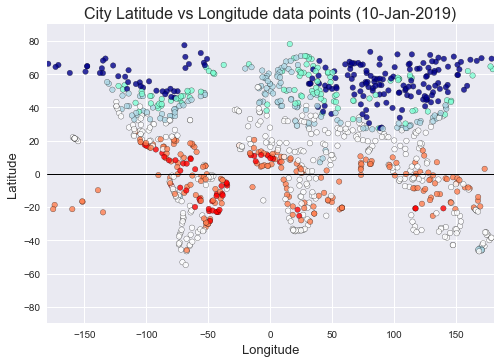

In [45]:
x = weather_data_csv['Longitude'].values
y = weather_data_csv['Latitude'].values
c =  weather_data_csv['color'].values

plt.figure()

mpl.style.use('seaborn')
plt.scatter(x, y, marker="o", c = c, edgecolors="black", alpha=0.80, s = 30)

plt.grid(color='w', linestyle='-', linewidth=1)
plt.title('City Latitude vs Longitude data points (10-Jan-2019)', fontsize=16)
plt.xlabel('Longitude', fontsize=13)
plt.ylabel('Latitude', fontsize=13)
plt.xlim(-180, 180) 
plt.ylim(-90, 90) 
plt.axhline(0, color='black', lw=1)

plt.show()
#plt.savefig('output/00_Latitude_vs_Longitude_data_points_v2.png', bbox_inches="tight")

plt.close() 

##### Latitude vs Temperature

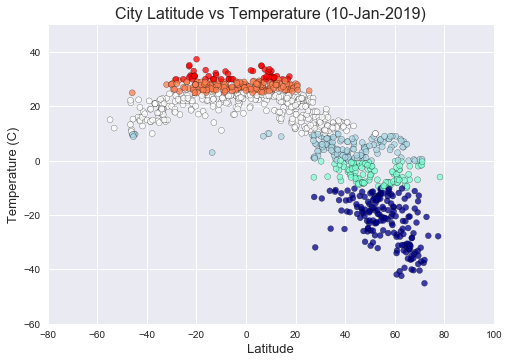

In [224]:
x = weather_data_csv['Latitude'].values
y = weather_data_csv['Temperature'].values
c = weather_data_csv['color'].values

plt.figure()

mpl.style.use('seaborn')
plt.scatter(x, y, marker="o", c = c, edgecolors="black", alpha=0.75, s = 35)

plt.grid(color='w', linestyle='-', linewidth=1)
plt.title('City Latitude vs Temperature (10-Jan-2019)', fontsize=16)
plt.xlabel('Latitude', fontsize=13)
plt.ylabel('Temperature (C)', fontsize=13)
plt.xlim(-80, 100) 
plt.ylim(-60, 50) 

plt.show()
#plt.savefig('output/01_City_Latitude_vs_Temperature_v2.png', bbox_inches="tight")

plt.close() 

##### Latitude vs Humidity

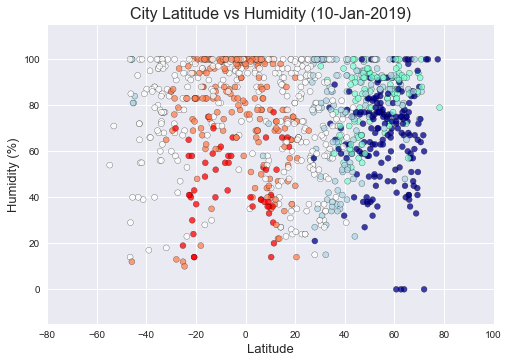

In [225]:
x = weather_data_csv['Latitude'].values
y = weather_data_csv['Humidity'].values
c = weather_data_csv['color'].values


#for i in range(len(y)):
#    if y[i]>100:
#        print(y[i])
        #y[i] = 100

fig = plt.figure()

plt.scatter(x, y, marker="o", c = c, edgecolors="black", alpha=0.75, s = 35)

plt.grid(color='w', linestyle='-', linewidth=1)
plt.title('City Latitude vs Humidity (10-Jan-2019)', fontsize=16)
plt.xlabel('Latitude', fontsize=13)
plt.ylabel('Humidity (%)', fontsize=13)
plt.xlim(-80, 100) 
plt.ylim(-15, 115) 

mpl.style.use('seaborn')

plt.show()
#plt.savefig('output/02_City_Latitude_vs_Humidity_v2.png', bbox_inches="tight")

plt.close() 

##### Latitude vs Cloudiness

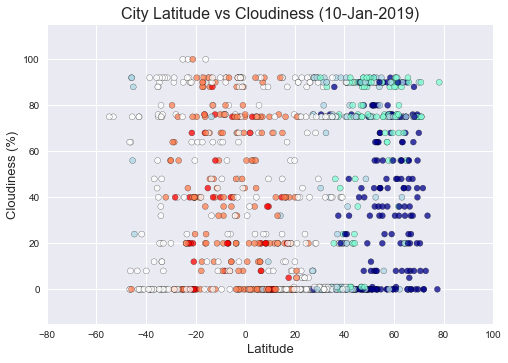

In [226]:
x = weather_data_csv['Latitude'].values
y = weather_data_csv['Clouds'].values
c = weather_data_csv['color'].values


#for i in range(len(y)):
#    if y[i]>100:
#        print(y[i])
        #y[i] = 100

fig = plt.figure()

plt.scatter(x, y, marker="o", c = c, edgecolors="black", alpha=0.75, s = 35)

plt.grid(color='w', linestyle='-', linewidth=1)
plt.title('City Latitude vs Cloudiness (10-Jan-2019)', fontsize=16)
plt.xlabel('Latitude', fontsize=13)
plt.ylabel('Cloudiness (%)', fontsize=13)
plt.xlim(-80, 100) 
plt.ylim(-15, 115) 
mpl.style.use('seaborn')

plt.show()
#plt.savefig('output/03_City_Latitude_vs_Cloudiness_v2.png', bbox_inches="tight")

plt.close() 

##### Latitude vs Wind Speed

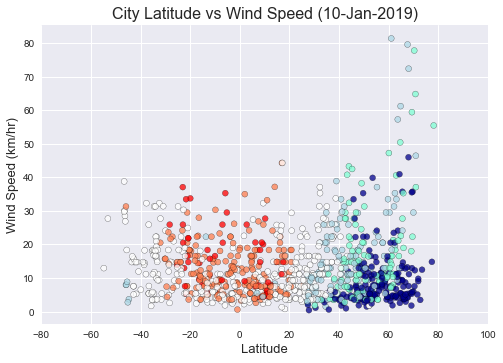

In [227]:
x = weather_data_csv['Latitude'].values
y = weather_data_csv['Wind'].values*3.6
c = weather_data_csv['color'].values

fig = plt.figure()

plt.scatter(x, y, marker="o", c = c, edgecolors="black", alpha=0.75, s = 35)

plt.grid(color='w', linestyle='-', linewidth=1)
plt.title('City Latitude vs Wind Speed (10-Jan-2019)', fontsize=16)
plt.xlabel('Latitude', fontsize=13)
plt.ylabel('Wind Speed (km/hr)', fontsize=13)
plt.xlim(-80, 100) 
#plt.ylim(-3, 50) 

mpl.style.use('seaborn')

plt.show()
#plt.savefig('output/04_City_Latitude_vs_Wind_Speed_v2.png', bbox_inches="tight")

plt.close() 

---